# Impact of Covid-19 in India


---



<center><img src="https://c.ndtvimg.com/2020-08/s4buv5c_coronavirus-india-generic_625x300_10_August_20.jpg"></center>

COVID-19 is an contagious disease caused by Coronovirus, biologically known as (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease has since spread exponentially worldwide, leading to an ongoing pandemic.
As of 6 August 2021 there are **200 million** (202,576,760) **confirmed cases**  and more than **4 million** (4,294,317) **deaths**

######## Image


## Introduction


This dataset contains data of various Indian states.
[Link to Dataset](https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv)

It contains columns 'Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'.

The second dataset contains aprroximate population and area of various state which I collected myself from Statewise Aadhar saturation data in uidai website and Wikipedia


## Data Preprocessing 

**Description of columns**

- Sno - Number of reported Case
- Date - YYYY-MM-DD
- Time - HH:MM AM/PM
- State/UnionTerritory - Indian States or Union Territories
- ConfirmedIndianNational - Confirmed corona cases of Indian National
- ConfirmedForeignNational - Confirmed corona cases of Foreign National
- Cured - Recovered from Covid-19
- Deaths - Deaths due to Covid-19
- Confirmed - Confirmed corona cases

**Necessary Imports and Mounting Data**

In [137]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


**Loading Data into Dataframe**

In [138]:
# changing directory to where data is stored
os.chdir('/gdrive/MyDrive/Data')
covid19_IN = pd.read_csv("covid_19_india.csv")

excel_file = pd.ExcelFile("ISPA.xlsx")
indian_states = excel_file.parse('Sheet1')

In [139]:
covid19_IN.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [140]:
covid19_IN.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
17781,17782,2021-08-02,8:00 AM,Telangana,-,-,632728,3805,645406
17782,17783,2021-08-02,8:00 AM,Tripura,-,-,74875,755,78722
17783,17784,2021-08-02,8:00 AM,Uttarakhand,-,-,334190,7362,342161
17784,17785,2021-08-02,8:00 AM,Uttar Pradesh,-,-,1685049,22763,1708476
17785,17786,2021-08-02,8:00 AM,West Bengal,-,-,1499597,18149,1528720


We can see the dataset provides day by record of number of cases found in a specific state in India from 31st Jan 2021 till 2 August 2021. It contains 17785 entries and 9 features. The 'Confirmed' column has total number of cases and not the new cases found that day, we have to keep this in mind

In [141]:
covid19_IN.shape

(17786, 9)

In [142]:
covid19_IN.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Here, we see that the dataset has no missing values in this dataset which will make analyzing it easier. Lets load the records of the last day in the dataset to have an idea of the state we're in

In [143]:
covid19_IN_recent = covid19_IN[covid19_IN['Date'] == '2021-08-02']
covid19_IN_recent.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
17750,17751,2021-08-02,8:00 AM,Andaman and Nicobar Islands,-,-,7403,129,7539
17751,17752,2021-08-02,8:00 AM,Andhra Pradesh,-,-,1934048,13395,1968462
17752,17753,2021-08-02,8:00 AM,Arunachal Pradesh,-,-,44354,231,48260
17753,17754,2021-08-02,8:00 AM,Assam,-,-,549065,5275,566982
17754,17755,2021-08-02,8:00 AM,Bihar,-,-,714801,9644,724880


In [144]:
covid19_IN_recent['Confirmed'].sum()

31695958

After preprocessing the dataset we see that India has total of **31,695,958** cases as of 2 August 2021

## Statewise Figures

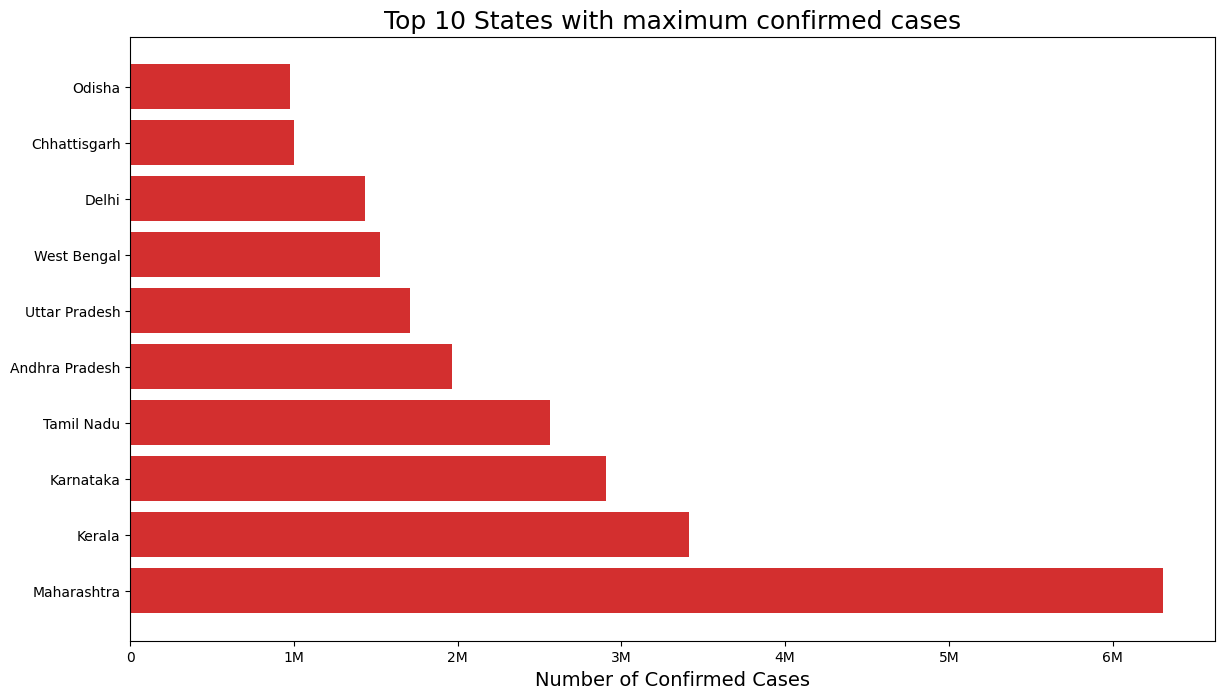

In [145]:
covid19_IN_recent = covid19_IN_recent.sort_values(by=['Confirmed'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(covid19_IN_recent['State/UnionTerritory'][:10], covid19_IN_recent['Confirmed'][:10],
         align='center', color='#D32F2F')
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of Confirmed Cases', size = 14)
plt.title('Top 10 States with maximum confirmed cases', size = 18)
plt.show()

On inspecting the visualization, we can see that Maharashtra has more than 6 million confirmed cases, highest in India. Wheras Kerala and Karnataka has around 3 million reported cases, Tamil Nadu has approximately 2.5 million reported cases while the rest have less than 2 million reported cases.

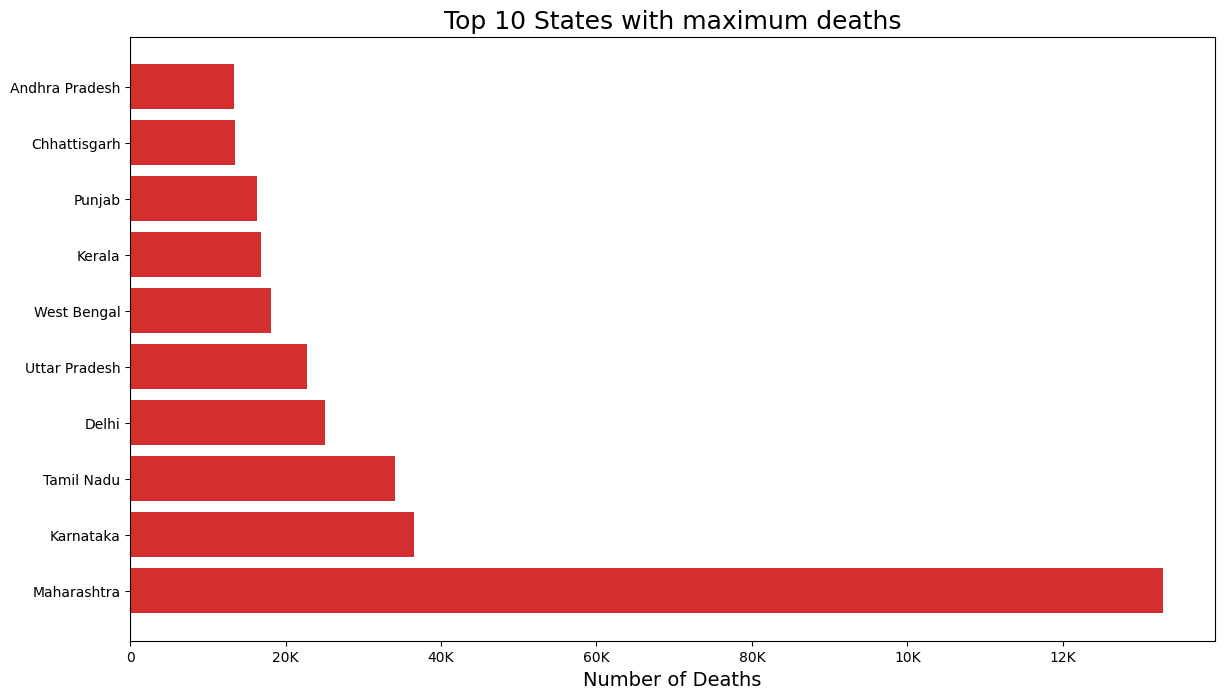

In [146]:
covid19_IN_recent = covid19_IN_recent.sort_values(by=['Deaths'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(covid19_IN_recent['State/UnionTerritory'][:10], covid19_IN_recent['Deaths'][:10],
         align='center', color='#D32F2F')
plt.xticks([0,20000,40000,60000,80000,100000,120000],['0','20K','40K','60K','80K','10K','12K'])
plt.xlabel('Number of Deaths', size = 14)
plt.title('Top 10 States with maximum deaths', size = 18)
plt.show()

In [147]:
covid19_IN_recent['Deaths'].sum()

424773

India has total of 424,773 deaths due to Covid-19 in which Maharashtra accounts for more than 1.2 million deaths, Karnataka and Tamil Nadu has around 400,000 deaths, Delhi has less 300,000 deaths and rest have comparatively less deaths.

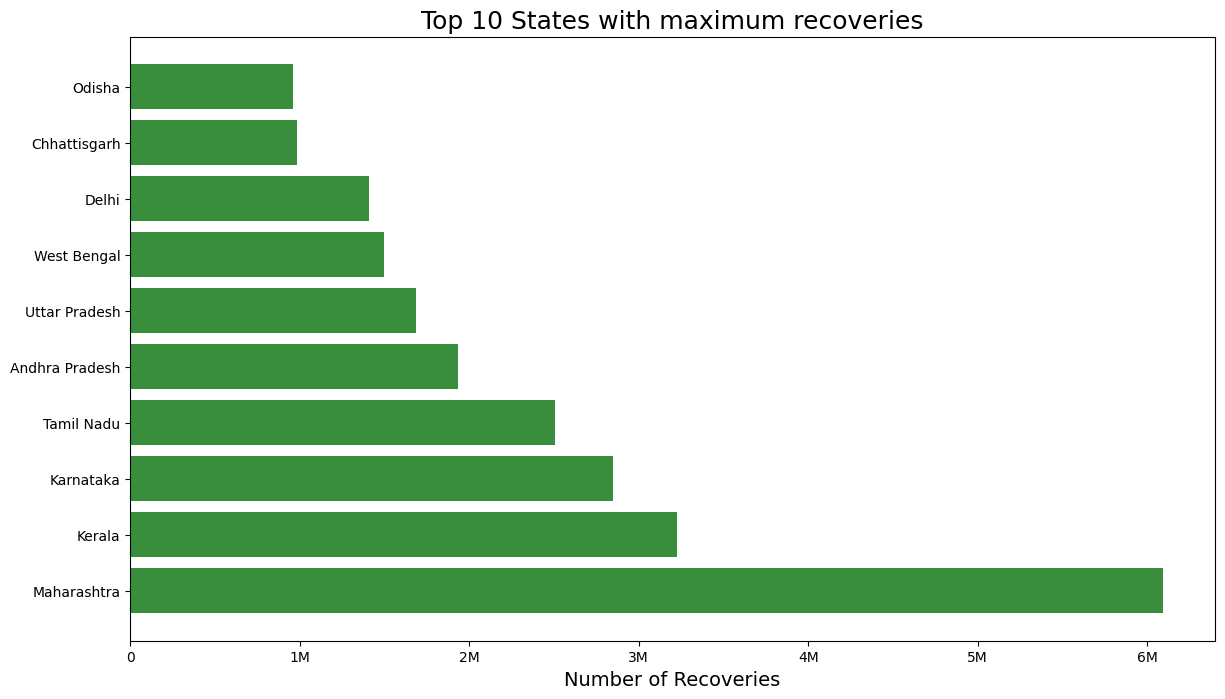

In [148]:
covid19_IN_recent = covid19_IN_recent.sort_values(by=['Cured'], ascending= False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(covid19_IN_recent['State/UnionTerritory'][:10], covid19_IN_recent['Cured'][:10],
         align='center', color='#388E3C')
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of Recoveries', size = 14)
plt.title('Top 10 States with maximum recoveries', size = 18)
plt.show()

The states which contributes most to the number of cases in India also have most number of recoveries which means recovering from Covid-19 has very high chances if proper treatment is followed.

But this doesn't gives us idea about the state of healthcare in different states, so to get an idea we should check Death rate(Death per confirmed case) of states.

In [149]:
covid19_IN_recent['Death Rate'] = (covid19_IN_recent['Deaths'] / covid19_IN_recent['Confirmed'])
covid19_IN_recent.isna().sum()
covid19_IN_recent

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Death Rate
17770,17771,2021-08-02,8:00 AM,Maharashtra,-,-,6094896,132948,6310194,0.021069
17766,17767,2021-08-02,8:00 AM,Kerala,-,-,3226761,16837,3411489,0.004935
17765,17766,2021-08-02,8:00 AM,Karnataka,-,-,2846244,36587,2906999,0.012586
17780,17781,2021-08-02,8:00 AM,Tamil Nadu,-,-,2506961,34102,2561587,0.013313
17751,17752,2021-08-02,8:00 AM,Andhra Pradesh,-,-,1934048,13395,1968462,0.006805
17784,17785,2021-08-02,8:00 AM,Uttar Pradesh,-,-,1685049,22763,1708476,0.013324
17785,17786,2021-08-02,8:00 AM,West Bengal,-,-,1499597,18149,1528720,0.011872
17758,17759,2021-08-02,8:00 AM,Delhi,-,-,1410714,25054,1436350,0.017443
17756,17757,2021-08-02,8:00 AM,Chhattisgarh,-,-,986778,13525,1002222,0.013495
17775,17776,2021-08-02,8:00 AM,Odisha,-,-,958601,5966,978705,0.006096


In [150]:
covid19_IN_recent['Recovery Rate'] = (covid19_IN_recent['Cured'] / covid19_IN_recent['Confirmed'])
#covid19_IN_recent.isna().sum()
covid19_IN_recent

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Death Rate,Recovery Rate
17770,17771,2021-08-02,8:00 AM,Maharashtra,-,-,6094896,132948,6310194,0.021069,0.965881
17766,17767,2021-08-02,8:00 AM,Kerala,-,-,3226761,16837,3411489,0.004935,0.945851
17765,17766,2021-08-02,8:00 AM,Karnataka,-,-,2846244,36587,2906999,0.012586,0.979100
17780,17781,2021-08-02,8:00 AM,Tamil Nadu,-,-,2506961,34102,2561587,0.013313,0.978675
17751,17752,2021-08-02,8:00 AM,Andhra Pradesh,-,-,1934048,13395,1968462,0.006805,0.982517
17784,17785,2021-08-02,8:00 AM,Uttar Pradesh,-,-,1685049,22763,1708476,0.013324,0.986288
17785,17786,2021-08-02,8:00 AM,West Bengal,-,-,1499597,18149,1528720,0.011872,0.980949
17758,17759,2021-08-02,8:00 AM,Delhi,-,-,1410714,25054,1436350,0.017443,0.982152
17756,17757,2021-08-02,8:00 AM,Chhattisgarh,-,-,986778,13525,1002222,0.013495,0.984590
17775,17776,2021-08-02,8:00 AM,Odisha,-,-,958601,5966,978705,0.006096,0.979459


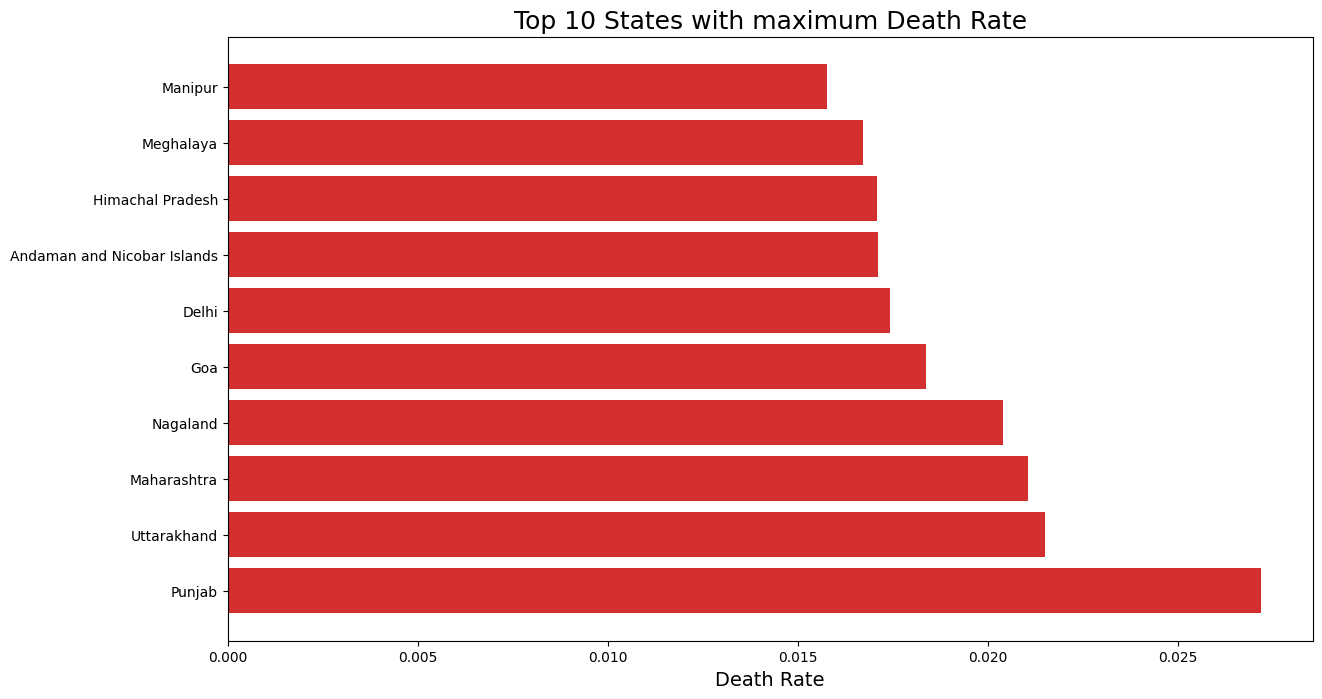

In [151]:
covid19_IN_recent = covid19_IN_recent.sort_values(by = ['Death Rate'], ascending=False)
plt.figure(figsize =(14,8), dpi=100)
plt.barh(covid19_IN_recent['State/UnionTerritory'][:10], covid19_IN_recent['Death Rate'][:10],
         align='center', color='#D32F2F')
plt.xlabel('Death Rate', size = 14)
plt.title('Top 10 States with maximum Death Rate', size = 18)
plt.show()

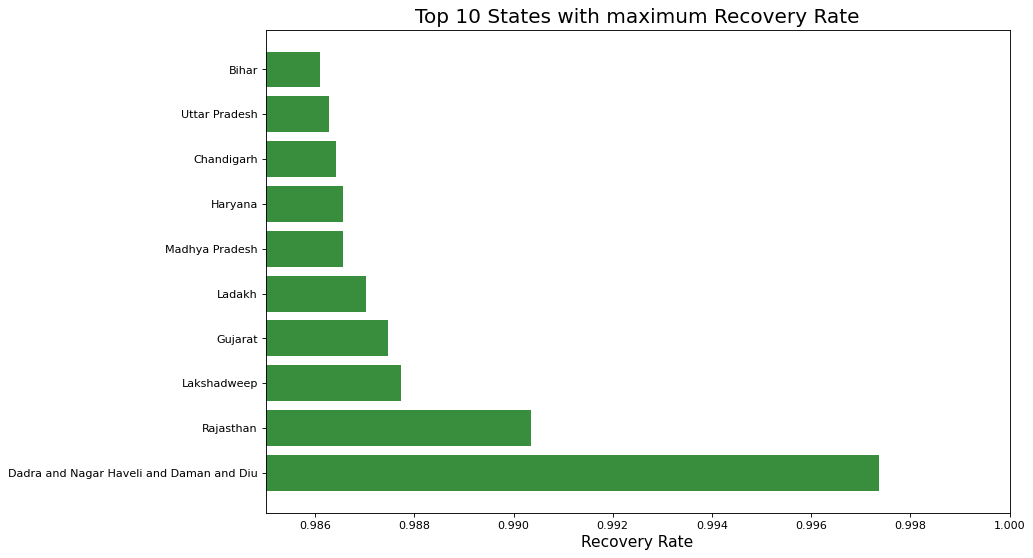

In [152]:
covid19_IN_recent = covid19_IN_recent.sort_values(by = ['Recovery Rate'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(covid19_IN_recent['State/UnionTerritory'][:10], covid19_IN_recent['Recovery Rate'][:10], 
        align='center',color='#388E3C')
plt.xlabel('Recovery Rate', size = 14)
plt.xlim(0.985,1)
plt.title('Top 10 States with maximum Recovery Rate', size = 18)
plt.show()

After plotting this graph we get to know about the state of healthcare in different states of India. From this we can infer that Punjab's healthcare is in very poor state, with death rate more than 0.025%. Dadra and Nagar Haveli and Daman and Diu has the best recovery rate all over India

However these statistics do not portray a clear picture since India is a country of varying demographics and there's a huge difference between two states. We can try to analyze the spread of virus among a specific sample size in various states to get a clear picture of the spread of Covid-19.

## Cases per 10 Million

In [153]:
indian_states.head()

,State,Aadhaar assigned as of June 21,Area (per sq km)
0,Andaman and Nicobar Islands,386484,8249
1,Andhra Pradesh,50987456,160205
2,Arunachal Pradesh,1232971,83743
3,Assam,22329699,78438
4,Bihar,104581560,94163


In [154]:
indian_states.columns = ['State/UnionTerritory', 'Population', 'Area']
indian_states.head()

,State/UnionTerritory,Population,Area
0,Andaman and Nicobar Islands,386484,8249
1,Andhra Pradesh,50987456,160205
2,Arunachal Pradesh,1232971,83743
3,Assam,22329699,78438
4,Bihar,104581560,94163


This dataset is collected by me from the UIDAI website(for number of Aadhar cards assigned) and wikipedia(for area of a state). The number of Aadhar cards assigned is a good estimate of the population of the state rather than using the population census which was last done in 2011 and the population has changed quite a lot after a that 

In [155]:
covid19_IN_recent = covid19_IN_recent.drop(['Sno', 'Date', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis =1)
covid19_IN_recent = covid19_IN_recent.sort_values(by=['State/UnionTerritory'])
covid19_IN_recent

,State/UnionTerritory,Cured,Deaths,Confirmed,Death Rate,Recovery Rate
17750,Andaman and Nicobar Islands,7403,129,7539,0.017111,0.981960
17751,Andhra Pradesh,1934048,13395,1968462,0.006805,0.982517
17752,Arunachal Pradesh,44354,231,48260,0.004787,0.919063
17753,Assam,549065,5275,566982,0.009304,0.968399
17754,Bihar,714801,9644,724880,0.013304,0.986096
17755,Chandigarh,61113,811,61954,0.013090,0.986425
17756,Chhattisgarh,986778,13525,1002222,0.013495,0.984590
17757,Dadra and Nagar Haveli and Daman and Diu,10622,4,10650,0.000376,0.997371
17758,Delhi,1410714,25054,1436350,0.017443,0.982152
17759,Goa,167046,3148,171205,0.018387,0.975707


In [156]:
covid19_merged = pd.merge(covid19_IN_recent, indian_states, on= 'State/UnionTerritory')
covid19_merged.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Death Rate,Recovery Rate,Population,Area
0,Andaman and Nicobar Islands,7403,129,7539,0.017111,0.981960,386484,8249
1,Andhra Pradesh,1934048,13395,1968462,0.006805,0.982517,50987456,160205
2,Arunachal Pradesh,44354,231,48260,0.004787,0.919063,1232971,83743
3,Assam,549065,5275,566982,0.009304,0.968399,22329699,78438
4,Bihar,714801,9644,724880,0.013304,0.986096,104581560,94163


In [157]:
covid19_merged['Cases/10million'] = (covid19_merged['Confirmed'] / covid19_merged['Population']) * 10000000
covid19_merged.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Death Rate,Recovery Rate,Population,Area,Cases/10million
0,Andaman and Nicobar Islands,7403,129,7539,0.017111,0.981960,386484,8249,195066.289937
1,Andhra Pradesh,1934048,13395,1968462,0.006805,0.982517,50987456,160205,386067.898740
2,Arunachal Pradesh,44354,231,48260,0.004787,0.919063,1232971,83743,391412.287880
3,Assam,549065,5275,566982,0.009304,0.968399,22329699,78438,253913.857056
4,Bihar,714801,9644,724880,0.013304,0.986096,104581560,94163,69312.410333


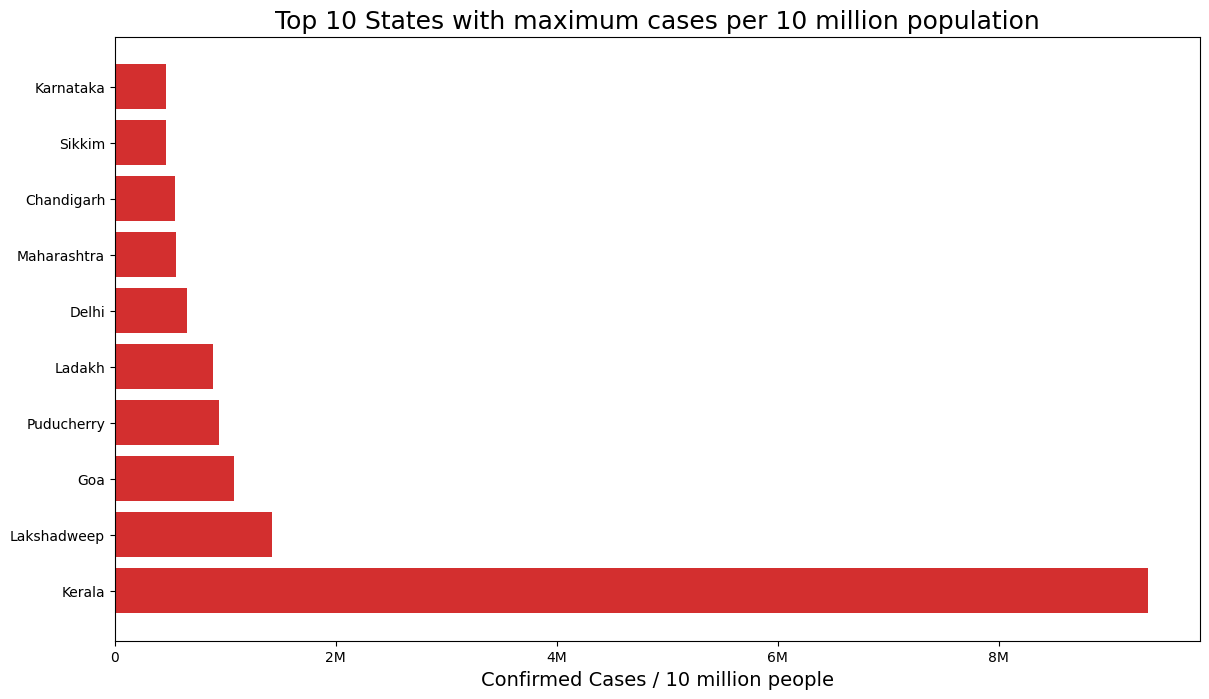

In [158]:
covid19_merged = covid19_merged.sort_values(by = ['Cases/10million'], ascending = False)
plt.figure(figsize=(14,8), dpi=100)
plt.barh(covid19_merged['State/UnionTerritory'][:10], covid19_merged['Cases/10million'][:10], 
        align='center',color='#D32F2F')         
plt.xticks([0,2000000,4000000,6000000,8000000],['0','2M','4M','6M','8M'])
plt.xlabel('Confirmed Cases / 10 million people', size = 14)
plt.title('Top 10 States with maximum cases per 10 million population', size = 18)
plt.show()

Here we can see that spread of the virus in Maharashtra is not that bad even when it accounts for most of the confirmed cases and deaths in country, it can be attributed to its large population since it's the most densely packed state in the state. Kerala is in very bad state, the spread of virus is very high as compared to other states 

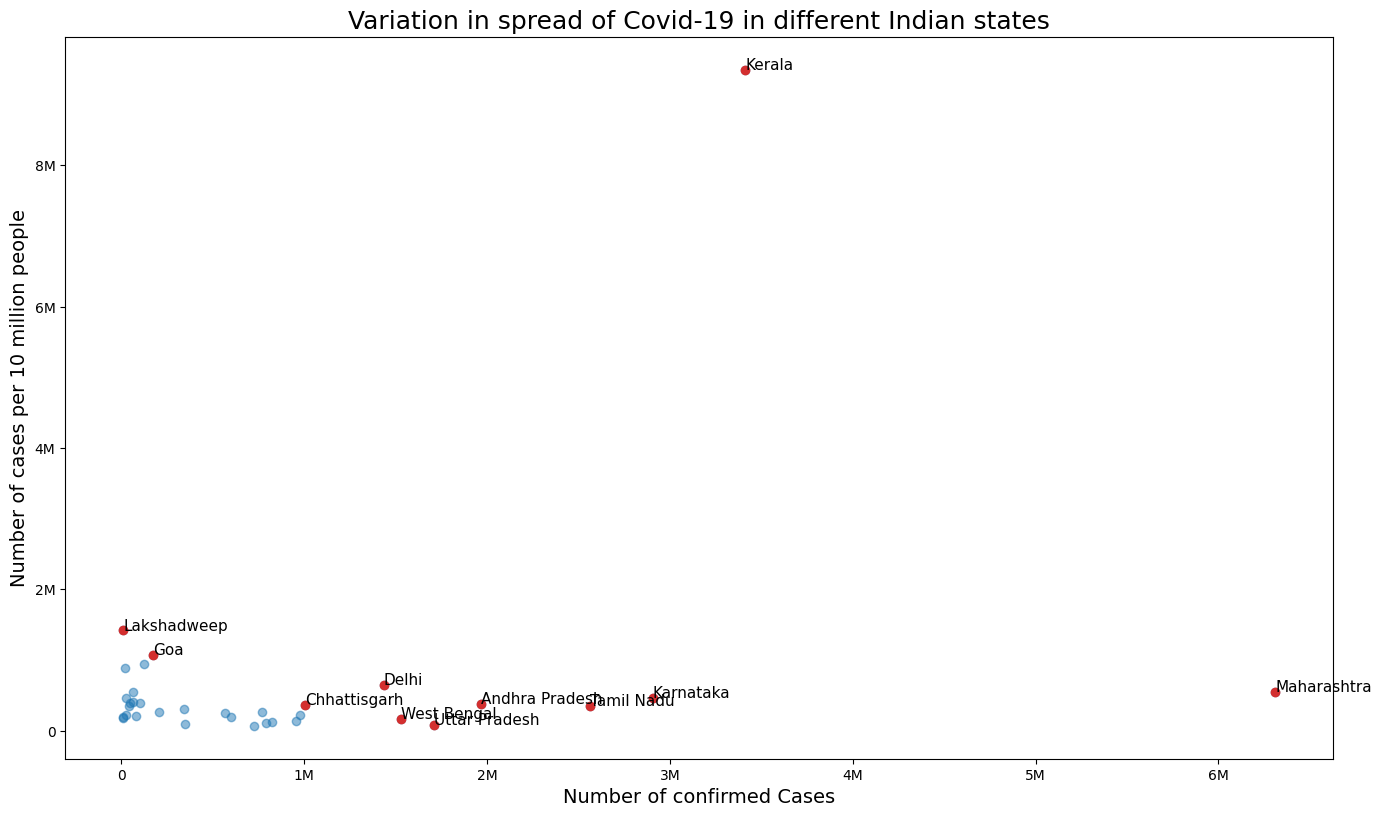

In [159]:
df = covid19_merged[(covid19_merged['Confirmed']>=1000000) | (covid19_merged['Cases/10million']>=1000000)]
plt.figure(figsize = (14,8), dpi= 100)
plt.scatter(covid19_merged['Confirmed'], covid19_merged['Cases/10million'], alpha = 0.5)
plt.scatter(df['Confirmed'], df['Cases/10million'], color="#D32F2F")
for i in range(df.shape[0]):
  plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
    xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0), size=11)
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of confirmed Cases', size=14)
plt.yticks([0,2000000,4000000,6000000,8000000],['0','2M','4M','6M','8M'])
plt.ylabel('Number of cases per 10 million people', size=14)
plt.tight_layout()
plt.title('Variation in spread of Covid-19 in different Indian states', size=18)
plt.show()

Here we can see that Maharashtra, Karnataka, Kerala and Tamil Nadu are badly hit indeed but the spread of virus is controlled as compared to Kerala

## Cases per 100km squared

In [160]:
covid19_merged['Cases/100km2'] = (covid19_merged['Confirmed'] / covid19_merged['Area'] * 100)
covid19_merged

,State/UnionTerritory,Cured,Deaths,Confirmed,Death Rate,Recovery Rate,Population,Area,Cases/10million,Cases/100km2
15,Kerala,3226761,16837,3411489,0.004935,0.945851,3647164,38863,9.353813e+06,8778.244088
17,Lakshadweep,10070,50,10195,0.004904,0.987739,71769,32,1.420530e+06,31859.375000
9,Goa,167046,3148,171205,0.018387,0.975707,1585610,3702,1.079742e+06,4624.662345
25,Puducherry,118228,1795,121005,0.014834,0.977051,1280316,479,9.451182e+05,25262.004175
16,Ladakh,20076,207,20340,0.010177,0.987021,228569,59146,8.898845e+05,34.389477
8,Delhi,1410714,25054,1436350,0.017443,0.982152,21960417,1483,6.540632e+05,96854.349292
19,Maharashtra,6094896,132948,6310194,0.021069,0.965881,114872435,307713,5.493219e+05,2050.675142
5,Chandigarh,61113,811,61954,0.013090,0.986425,1133219,114,5.467081e+05,54345.614035
28,Sikkim,22955,345,26754,0.012895,0.858003,574280,7096,4.658703e+05,377.029312
14,Karnataka,2846244,36587,2906999,0.012586,0.979100,62780331,191791,4.630430e+05,1515.711895


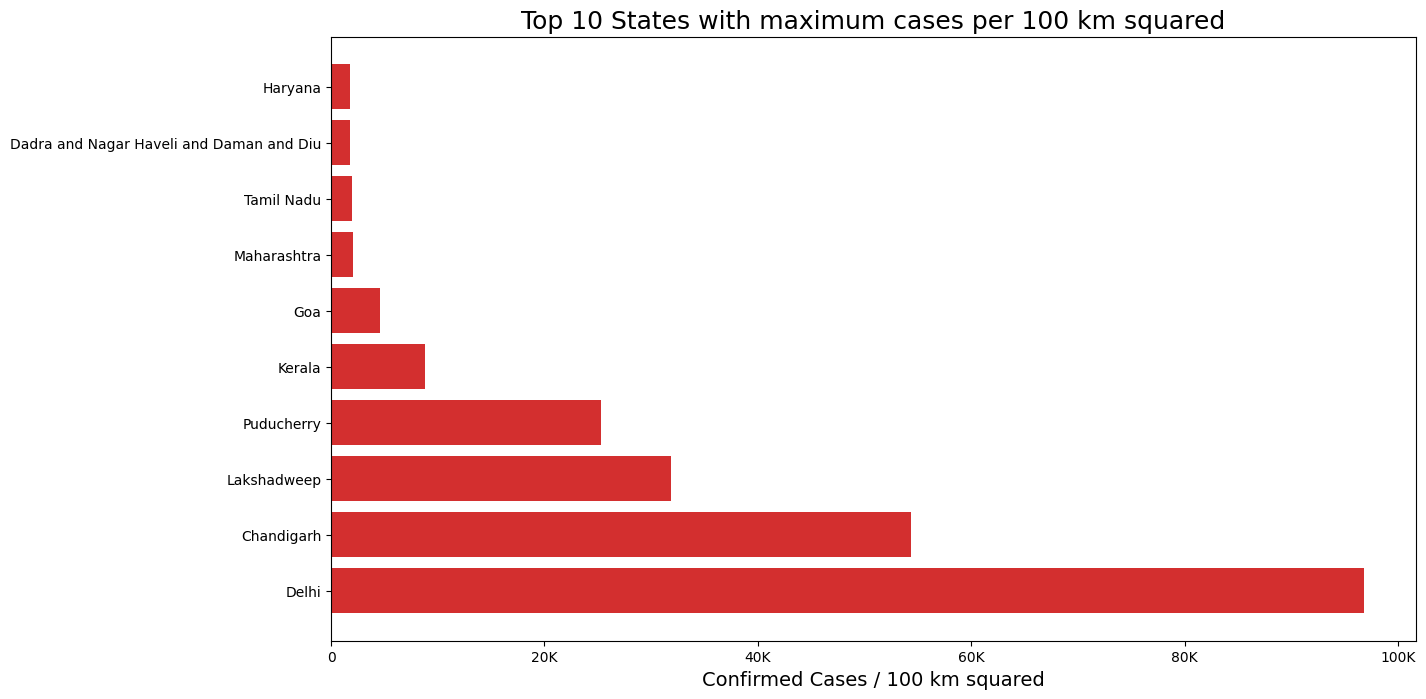

In [161]:
covid19_merged = covid19_merged.sort_values(by=['Cases/100km2'], ascending = False)
plt.figure(figsize=(14,8), dpi=100)
plt.barh(covid19_merged['State/UnionTerritory'][:10], covid19_merged['Cases/100km2'][:10], 
        align='center',color='#D32F2F')         
plt.xticks([0,20000,40000,60000,80000,100000],['0','20K','40K','60K','80K','100K'])
plt.xlabel('Confirmed Cases / 100 km squared', size = 14)
plt.title('Top 10 States with maximum cases per 100 km squared', size = 18)
plt.show()

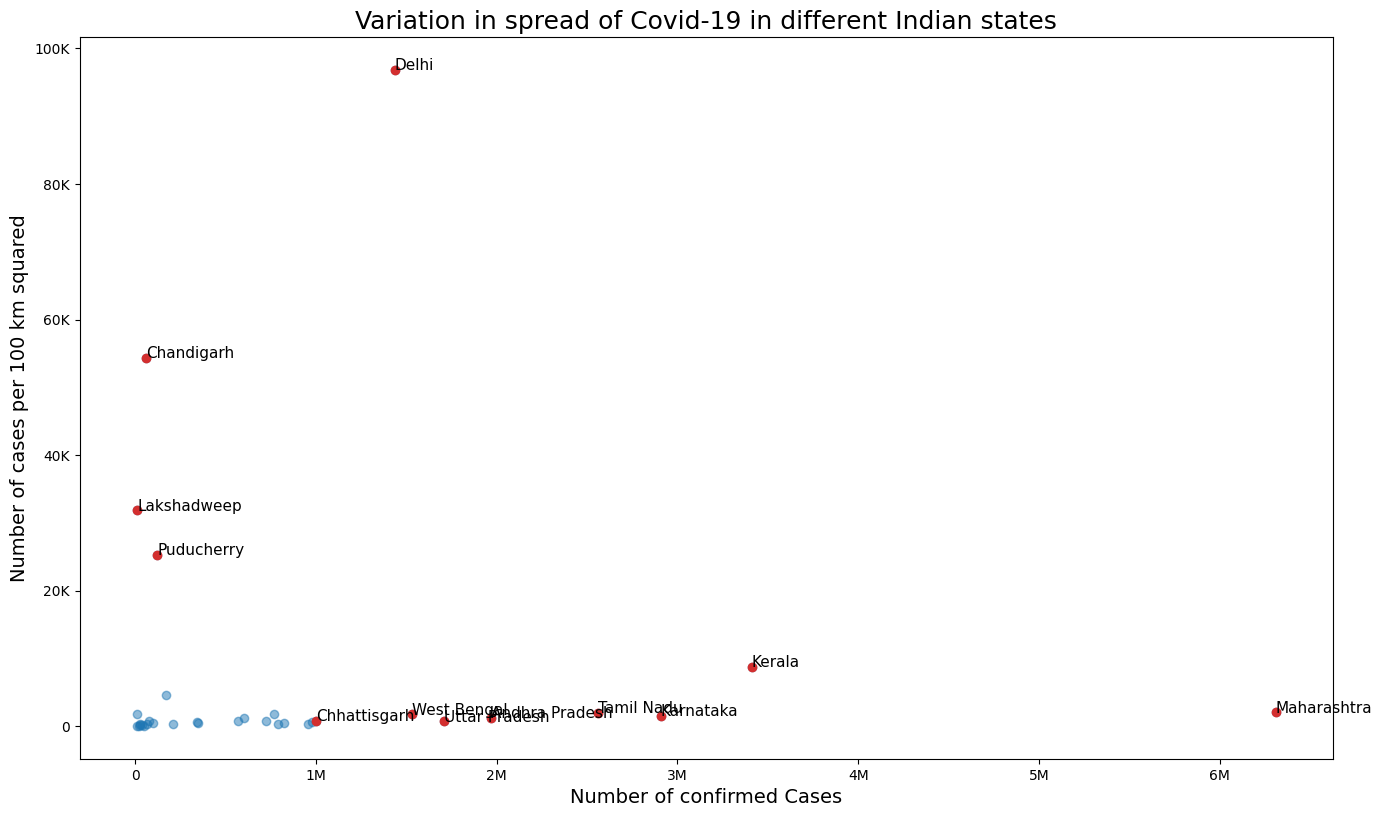

In [162]:
df = covid19_merged[(covid19_merged['Confirmed']>=1000000) | (covid19_merged['Cases/100km2']>=15000)]
plt.figure(figsize = (14,8), dpi= 100)
plt.scatter(covid19_merged['Confirmed'], covid19_merged['Cases/100km2'], alpha = 0.5)
plt.scatter(df['Confirmed'], df['Cases/100km2'], color="#D32F2F")
for i in range(df.shape[0]):
  plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i], df['Cases/100km2'].tolist()[i]),
    xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/100km2'].tolist()[i]+12.0), size=11)
plt.xticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.xlabel('Number of confirmed Cases', size=14)
plt.yticks([0,20000,40000,60000,80000,100000],['0','20K','40K','60K','80K','100K'])
plt.ylabel('Number of cases per 100 km squared', size=14)
plt.tight_layout()
plt.title('Variation in spread of Covid-19 in different Indian states', size=18)
plt.show()

## Progression of Case Count

Taking a look at the rate at which Covid-19 cases increase in different states. To keep it short, selecting the top 10 states with confirmed cases.

In [163]:
covid19_maharashtra = covid19_IN[covid19_IN['State/UnionTerritory'] == "Maharashtra"]
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra = covid19_maharashtra.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] + 1
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(511, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-09,Maharashtra,0,0,2
1,2,2020-03-10,Maharashtra,0,0,5
2,3,2020-03-11,Maharashtra,0,0,2
3,4,2020-03-12,Maharashtra,0,0,11
4,5,2020-03-13,Maharashtra,0,0,14


In [164]:
covid19_kerala = covid19_IN[covid19_IN['State/UnionTerritory'] == "Kerala"]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.tail()

(551, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
546,547,2021-07-29,Kerala,3160804,16457,3327301
547,548,2021-07-30,Kerala,3177453,16585,3349365
548,549,2021-07-31,Kerala,3192104,16701,3370137
549,550,2021-08-01,Kerala,3208969,16781,3390761
550,551,2021-08-02,Kerala,3226761,16837,3411489


In [165]:
covid19_karnataka = covid19_IN[covid19_IN['State/UnionTerritory'] == "Karnataka"]
covid19_karnataka.reset_index(inplace = True)
covid19_karnataka = covid19_karnataka.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_karnataka.reset_index(inplace = True)
covid19_karnataka.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_karnataka['Day Count'] = covid19_karnataka['Day Count'] + 1
print(covid19_karnataka.shape)
covid19_karnataka.head()

(511, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-09,Karnataka,0,0,1
1,2,2020-03-10,Karnataka,0,0,4
2,3,2020-03-11,Karnataka,0,0,4
3,4,2020-03-12,Karnataka,0,0,4
4,5,2020-03-13,Karnataka,0,1,6


In [166]:
covid19_tamil = covid19_IN[covid19_IN['State/UnionTerritory'] == "Tamil Nadu"]
covid19_tamil.reset_index(inplace = True)
covid19_tamil = covid19_tamil.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_tamil.reset_index(inplace = True)
covid19_tamil.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_tamil['Day Count'] = covid19_tamil['Day Count'] + 1
print(covid19_tamil.shape)
covid19_tamil.head()

(514, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-07,Tamil Nadu,0,0,1
1,2,2020-03-08,Tamil Nadu,0,0,1
2,3,2020-03-09,Tamil Nadu,0,0,1
3,4,2020-03-10,Tamil Nadu,0,0,1
4,5,2020-03-11,Tamil Nadu,0,0,1


In [167]:
covid19_andhra = covid19_IN[covid19_IN['State/UnionTerritory'] == "Andhra Pradesh"]
covid19_andhra.reset_index(inplace = True)
covid19_andhra = covid19_andhra.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_andhra.reset_index(inplace = True)
covid19_andhra.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_andhra['Day Count'] = covid19_andhra['Day Count'] + 1
print(covid19_andhra.shape)
covid19_andhra.head()

(509, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-12,Andhra Pradesh,0,0,1
1,2,2020-03-13,Andhra Pradesh,0,0,1
2,3,2020-03-14,Andhra Pradesh,0,0,1
3,4,2020-03-15,Andhra Pradesh,0,0,1
4,5,2020-03-16,Andhra Pradesh,0,0,1


In [168]:
covid19_UP = covid19_IN[covid19_IN['State/UnionTerritory'] == "Uttar Pradesh"]
covid19_UP.reset_index(inplace = True)
covid19_UP = covid19_UP.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_UP.reset_index(inplace = True)
covid19_UP.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_UP['Day Count'] = covid19_UP['Day Count'] + 1
print(covid19_UP.shape)
covid19_UP.head()

(517, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-04,Uttar Pradesh,0,0,6
1,2,2020-03-05,Uttar Pradesh,0,0,7
2,3,2020-03-06,Uttar Pradesh,0,0,7
3,4,2020-03-07,Uttar Pradesh,0,0,7
4,5,2020-03-08,Uttar Pradesh,0,0,7


In [169]:
covid19_bengal = covid19_IN[covid19_IN['State/UnionTerritory'] == "West Bengal"]
covid19_bengal.reset_index(inplace = True)
covid19_bengal = covid19_bengal.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_bengal.reset_index(inplace = True)
covid19_bengal.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_bengal['Day Count'] = covid19_bengal['Day Count'] + 1
print(covid19_bengal.shape)
covid19_bengal.head()

(503, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-18,West Bengal,0,0,1
1,2,2020-03-19,West Bengal,0,0,1
2,3,2020-03-20,West Bengal,0,0,2
3,4,2020-03-21,West Bengal,0,0,3
4,5,2020-03-22,West Bengal,0,0,4


In [170]:
covid19_delhi = covid19_IN[covid19_IN['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(519, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-02,Delhi,0,0,1
1,2,2020-03-03,Delhi,0,0,1
2,3,2020-03-04,Delhi,0,0,1
3,4,2020-03-05,Delhi,0,0,2
4,5,2020-03-06,Delhi,0,0,3


In [171]:
covid19_chhattisgarh = covid19_IN[covid19_IN['State/UnionTerritory'] == "Chhattisgarh"]
covid19_chhattisgarh.reset_index(inplace = True)
covid19_chhattisgarh = covid19_chhattisgarh.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_chhattisgarh.reset_index(inplace = True)
covid19_chhattisgarh.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_chhattisgarh['Day Count'] = covid19_chhattisgarh['Day Count'] + 1
print(covid19_chhattisgarh.shape)
covid19_chhattisgarh.head()

(502, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-19,Chhattisgarh,0,0,1
1,2,2020-03-20,Chhattisgarh,0,0,1
2,3,2020-03-21,Chhattisgarh,0,0,1
3,4,2020-03-22,Chhattisgarh,0,0,1
4,5,2020-03-23,Chhattisgarh,0,0,1


In [172]:
covid19_odisha = covid19_IN[covid19_IN['State/UnionTerritory'] == 'Odisha']
covid19_odisha.reset_index(inplace = True)
covid19_odisha = covid19_odisha.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)
covid19_odisha.reset_index(inplace = True)
covid19_odisha.columns = ['Day Count', 'Date', 'State/UnionTerritory','Cured','Deaths', 'Confirmed']
covid19_odisha['Day Count'] = covid19_odisha['Day Count'] + 1
print(covid19_odisha.shape)
covid19_odisha.head()

(505, 6)


,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-03-16,Odisha,0,0,1
1,2,2020-03-17,Odisha,0,0,1
2,3,2020-03-18,Odisha,0,0,1
3,4,2020-03-19,Odisha,0,0,1
4,5,2020-03-20,Odisha,0,0,2


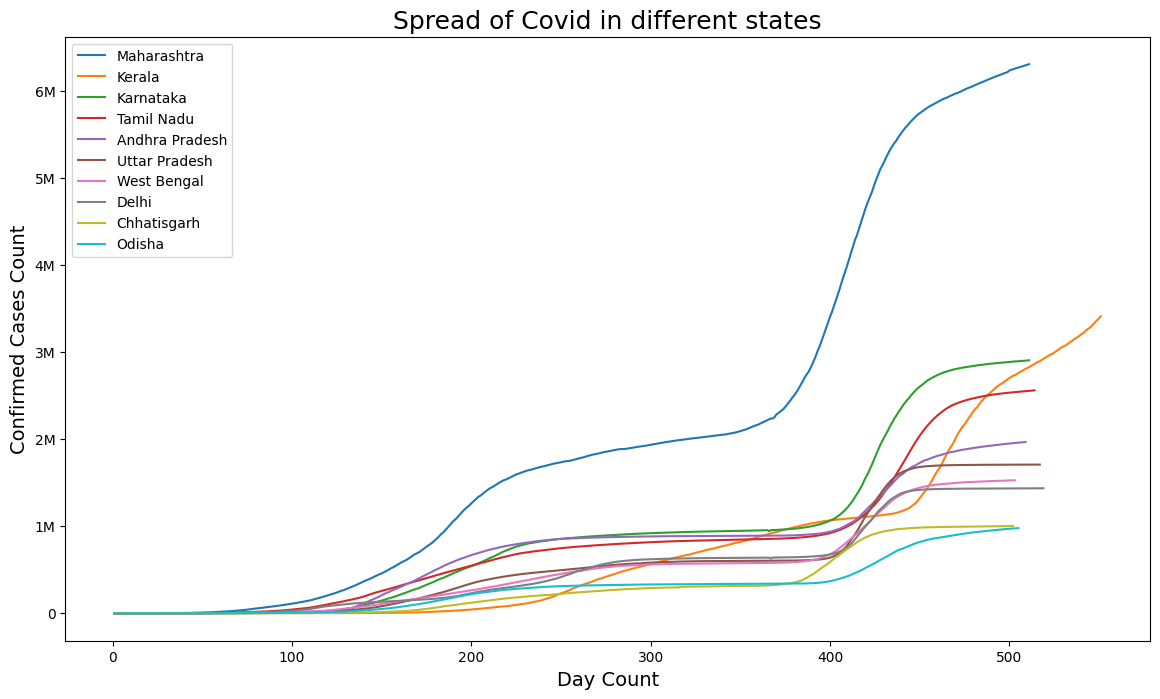

In [173]:
plt.figure(figsize=(14,8), dpi=100)
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_karnataka['Day Count'], covid19_karnataka['Confirmed'])
plt.plot(covid19_tamil['Day Count'], covid19_tamil['Confirmed'])
plt.plot(covid19_andhra['Day Count'], covid19_andhra['Confirmed'])
plt.plot(covid19_UP['Day Count'], covid19_UP['Confirmed'])
plt.plot(covid19_bengal['Day Count'], covid19_bengal['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_chhattisgarh['Day Count'], covid19_chhattisgarh['Confirmed'])
plt.plot(covid19_odisha['Day Count'], covid19_odisha['Confirmed'])

plt.legend(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Andhra Pradesh',
            'Uttar Pradesh','West Bengal','Delhi','Chhatisgarh','Odisha'], loc='upper left')
plt.xlabel('Day Count', size=14)
plt.yticks([0,1000000,2000000,3000000,4000000,5000000,6000000],['0','1M','2M','3M','4M','5M','6M'])
plt.ylabel('Confirmed Cases Count', size=14)
plt.title('Spread of Covid in different states', size = 18)
plt.show()

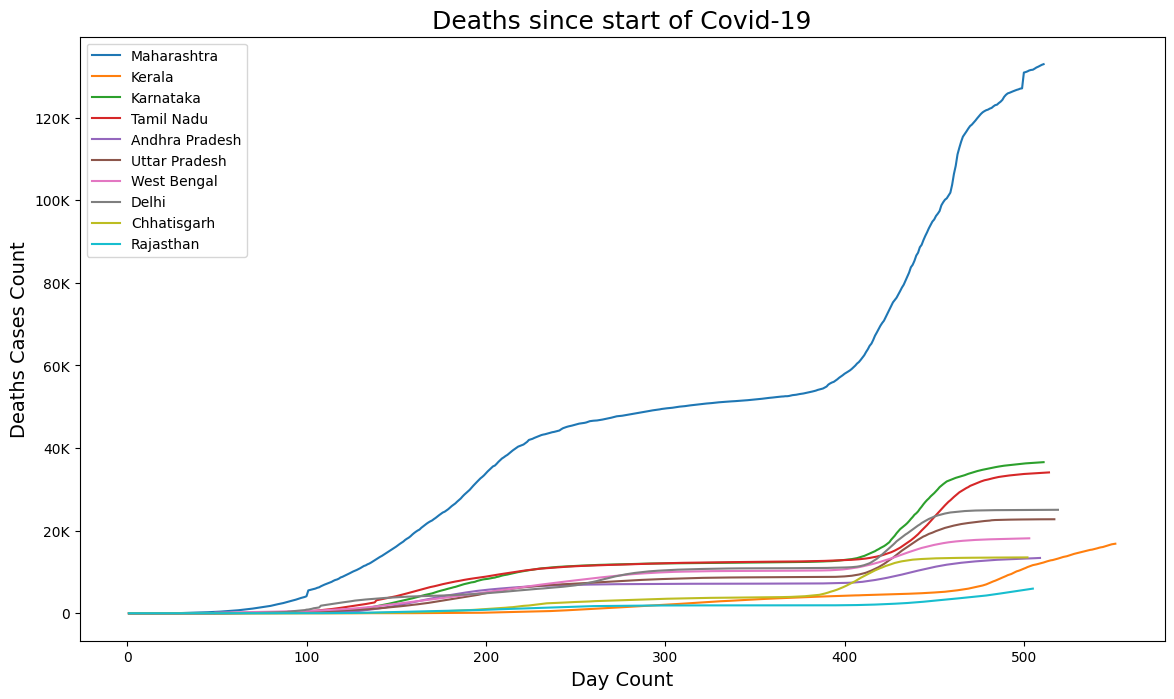

In [174]:
plt.figure(figsize=(14,8), dpi=100)
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Deaths'])
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Deaths'])
plt.plot(covid19_karnataka['Day Count'], covid19_karnataka['Deaths'])
plt.plot(covid19_tamil['Day Count'], covid19_tamil['Deaths'])
plt.plot(covid19_andhra['Day Count'], covid19_andhra['Deaths'])
plt.plot(covid19_UP['Day Count'], covid19_UP['Deaths'])
plt.plot(covid19_bengal['Day Count'], covid19_bengal['Deaths'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Deaths'])
plt.plot(covid19_chhattisgarh['Day Count'], covid19_chhattisgarh['Deaths'])
plt.plot(covid19_odisha['Day Count'], covid19_odisha['Deaths'])

plt.legend(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Andhra Pradesh','Uttar Pradesh','West Bengal','Delhi','Chhatisgarh','Rajasthan'], loc='upper left')
#plt.annotate('31-02-2020', xy=(0,0), xytext=(50,20000), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('02-08-2021',xy=(551,16837),xytext=(600,20000),arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel('Day Count', size=14)
plt.yticks([0,20000,40000,60000,80000,100000,120000],['0','20K','40K','60K','80K','100K','120K'])
plt.ylabel('Deaths Cases Count', size=14)
plt.title('Deaths since start of Covid-19', size = 18)
plt.show()

Almost all curves are similar except Odisha which managed to control the incline of the curve over longer period of time and then slight increas in curve due to the second wave, while Kerala managed to control the curve really well in the start but increased drastically after the first wave. The curve is as expected in Maharashtra since the population is high as compared to other states, and rest of states have similar curve to India as a whole

## Cases per Day

As we saw Maharashtra is the most affected state in India so lets see how many cases were found daily

In [ ]:
covid19_maharashtra['NewCases'] = 0
covid19_maharashtra['NewCases'][0] = 2
covid19_maharashtra['NewDeaths'] = 0
x = len(covid19_maharashtra.index)
for i in range(1,x):
  covid19_maharashtra['NewCases'][i] = covid19_maharashtra['Confirmed'][i] - covid19_maharashtra['Confirmed'][i-1] 
for i in range(1,x):
  covid19_maharashtra['NewDeaths'][i] = covid19_maharashtra['Deaths'][i] - covid19_maharashtra['Deaths'][i-1] 

In [176]:
covid19_maharashtra.isna().sum()
covid19_maharashtra.head()

,Day Count,Date,State/UnionTerritory,Cured,Deaths,Confirmed,NewCases,NewDeaths
0,1,2020-03-09,Maharashtra,0,0,2,2,0
1,2,2020-03-10,Maharashtra,0,0,5,3,0
2,3,2020-03-11,Maharashtra,0,0,2,-3,0
3,4,2020-03-12,Maharashtra,0,0,11,9,0
4,5,2020-03-13,Maharashtra,0,0,14,3,0


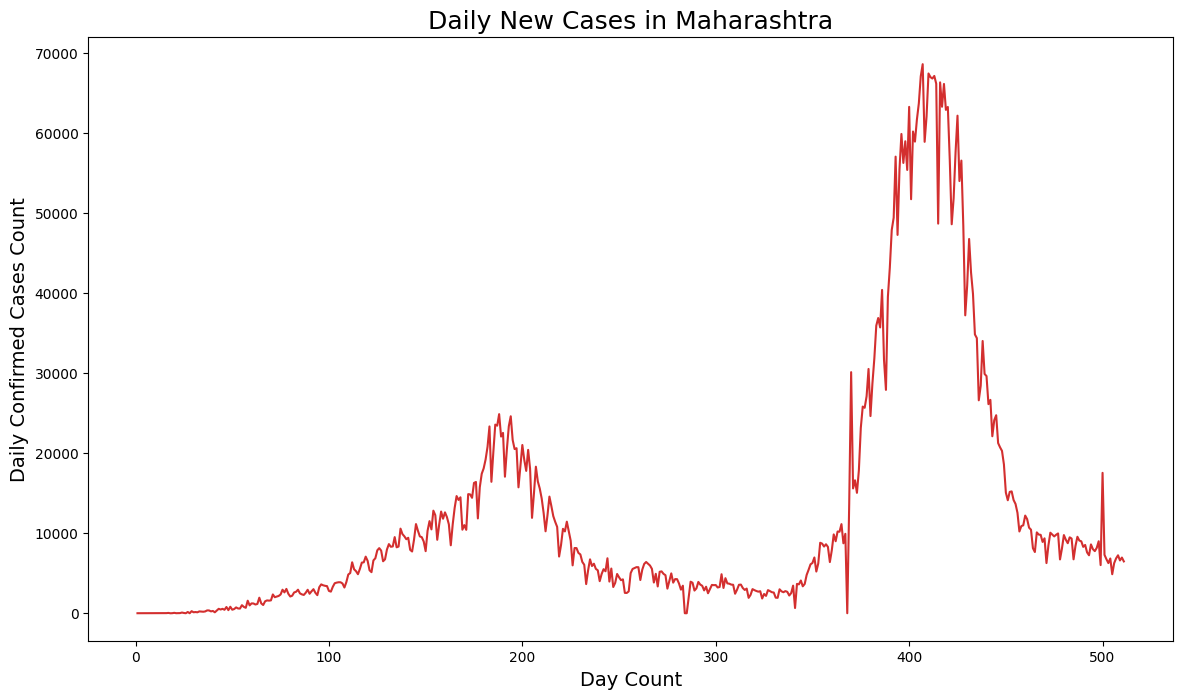

In [177]:
plt.figure(figsize=(14,8), dpi=100 )
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['NewCases'], color = '#D32F2F')
plt.xlabel('Day Count', size=14)
plt.ylabel('Daily Confirmed Cases Count', size=14)
plt.title('Daily New Cases in Maharashtra', size = 18)
plt.show()

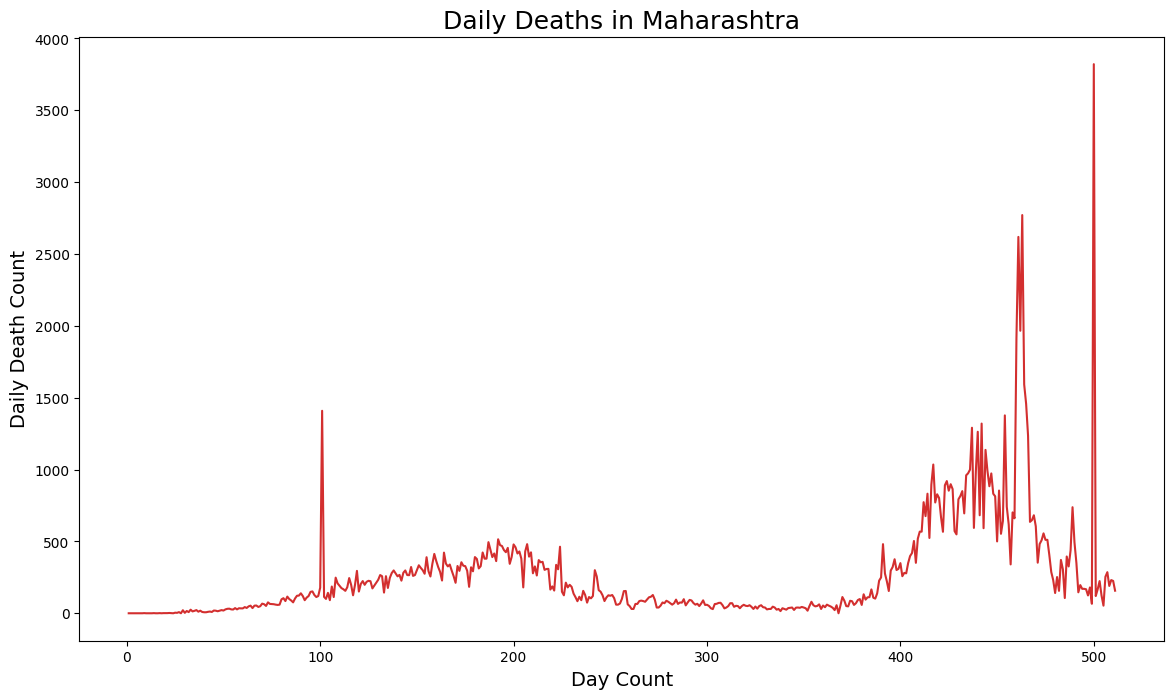

In [178]:
plt.figure(figsize=(14,8),dpi=100)
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['NewDeaths'],color = '#D32F2F')
plt.xlabel('Day Count', size=14)
plt.ylabel('Daily Death Count', size=14)
plt.title('Daily Deaths in Maharashtra', size = 18)
plt.show()

Our analysis ties in well with the known fact that the second wave of covid-19 was more deadly than the first wave with regards to daily new cases.

## Conclusion

<center><img src="https://c.ndtvimg.com/2021-03/ve47ako_coronavirus-india-reuters_625x300_18_March_21.jpg"></center>

- Maharashtra has the highest number of reported cases as a result it has most deaths and most recoveries.
- Punjab's Death rate is quite high(2.5%), every 1 in 40 person who reported positive is likely to die.
- Dadra and Nagar Haveli and Daman and Diu has the highest recovery rate(99.7%) which means for every 1000 reported cases 998 are likely to recover. 
- Kerala has more than 9 million cases per 10 million population which is very high.
- Maharashtra is the fastest growing in new cases perday on average. 

Here are article which validate my analysis

[Maharashtra-Covid19](https://economictimes.indiatimes.com/news/india/maha-mortality-rate-less-than-punjab-ukhand-nagaland-goa/articleshow/83351837.cms)

[Punjab-Covid19](https://www.thehindu.com/news/national/coronavirus-punjab-excess-deaths-three-times-official-toll/article35641394.ece)

[Kerala-Covid19](https://www.indiatoday.in/coronavirus-outbreak/story/kerala-to-witness-two-fold-increase-in-covid-cases-health-minister-veena-george-1837781-2021-08-06)